In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Exercise 1 : simple dataset with 2 features (same as previous TP)

## Load the data

In [5]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')
data

,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


## Train / Valid / Test split

In [3]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)
# 82 examples in train, 18 in valid and 18 in test

In [4]:
data_train.head()

,X1,X2,Y
98,-0.66302,-0.214180,0
88,-0.69758,0.041667,0
11,-0.11578,-0.396930,1
4,0.22984,-0.411550,1
65,0.82316,0.663010,0


## Plotting the training set

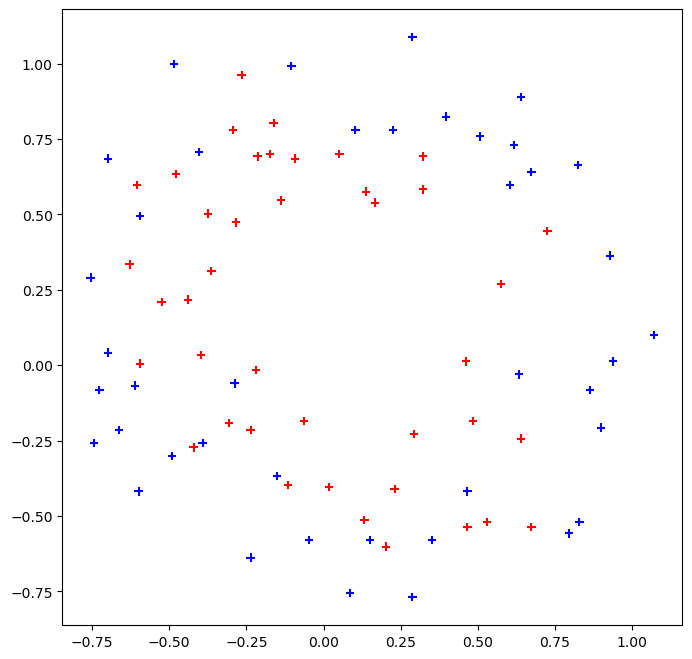

In [5]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.Y, cmap = color_map, marker='+')

## Fitting a decision tree

In [6]:
# The basic decision tree can be obtained easily by this command
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,:2],data_train.Y)
# More advanced options can be inserted into the 'DecisionTreeClassifier' function (we will see some later)
# The 'fit' function needs to have 2 parameters (at least) : 
# - the set of features describing the examples (here the 2 first columns of our train set)
# - the associated labels (classes, here the column 'Y' of our train set)


## Visualizing the obtained tree

[Text(0.6071428571428571, 0.9545454545454546, 'x[0] <= 0.76\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(0.5595238095238095, 0.8636363636363636, 'x[0] <= -0.646\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.5119047619047619, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6071428571428571, 0.7727272727272727, 'x[1] <= 0.703\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(0.30952380952380953, 0.6818181818181818, 'x[1] <= -0.558\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.09523809523809523, 0.5909090909090909, 'x[0] <= 0.175\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.047619047619047616, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 0.244\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.52

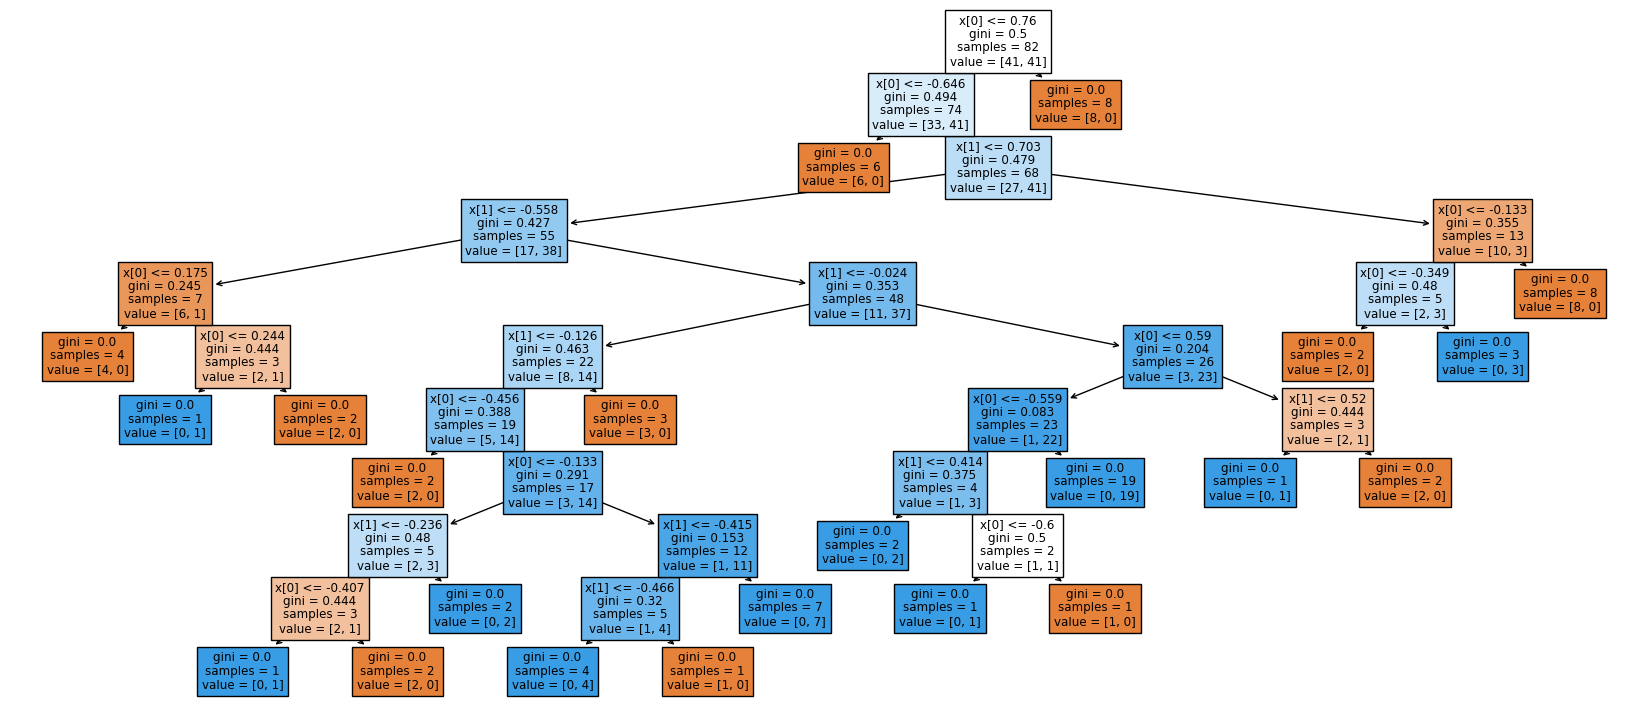

In [7]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)
# The 'plot_tree' function outputs two things : 
# - a text version of the tree (where are written the informations about all the nodes of the tree)
# - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

In [12]:
data_train.head()
dt.get_n_leaves()

22

In [9]:
data_train.head(1)

,X1,X2,Y
98,-0.66302,-0.21418,0


In [10]:
# We can obtain automatically the prediction of the tree for any example with the 'predict' command (as for logistic regression):
dt.predict(data_train.iloc[:1,:2])[0] # here I ask to predict the first example of the train set, need to give its features

0

In [11]:
dt.score(data_train.iloc[:,0:2],data_train.Y)

1.0

In [12]:
data_valid.head(1)

,X1,X2,Y
64,-0.20795,0.35599,1


In [13]:
dt.predict(data_valid.iloc[:1,:2])[0]

1

In [14]:
dt.score(data_valid.iloc[:,0:2],data_valid.Y)

0.8333333333333334

In [15]:
def draw_boundary_tree(model, data, x_min, x_max, y_min, y_max):
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


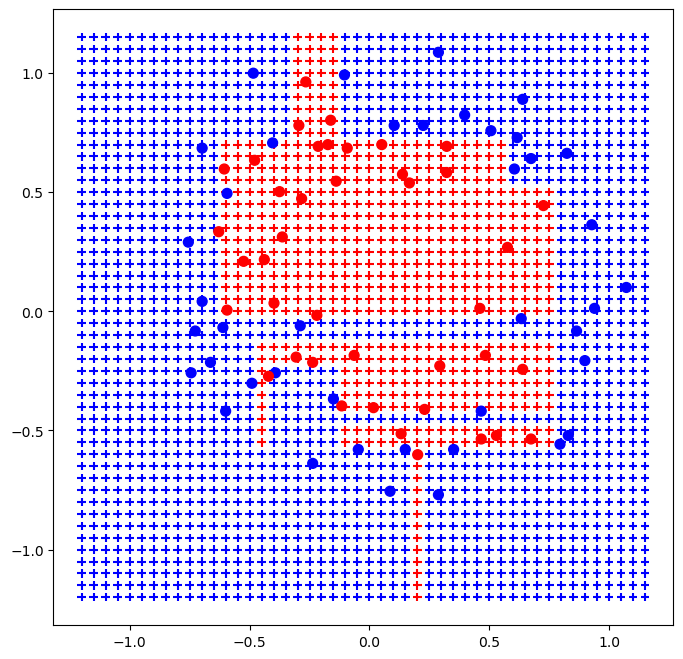

In [16]:
draw_boundary_tree(dt, data_train, -1.2, 1.2, -1.2, 1.2)

## Pruning the tree

In [17]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path

{'ccp_alphas': array([0.        , 0.0077766 , 0.01045296, 0.01117886, 0.01263351,
        0.01626016, 0.02513799, 0.02727425, 0.02814259, 0.05398197,
        0.05405405]),
 'impurities': array([0.        , 0.0233298 , 0.04423572, 0.06659345, 0.10449397,
        0.12075413, 0.14589213, 0.22771487, 0.28400004, 0.44594595,
        0.5       ])}

Text(0, 0.5, 'total impurity of leaves')

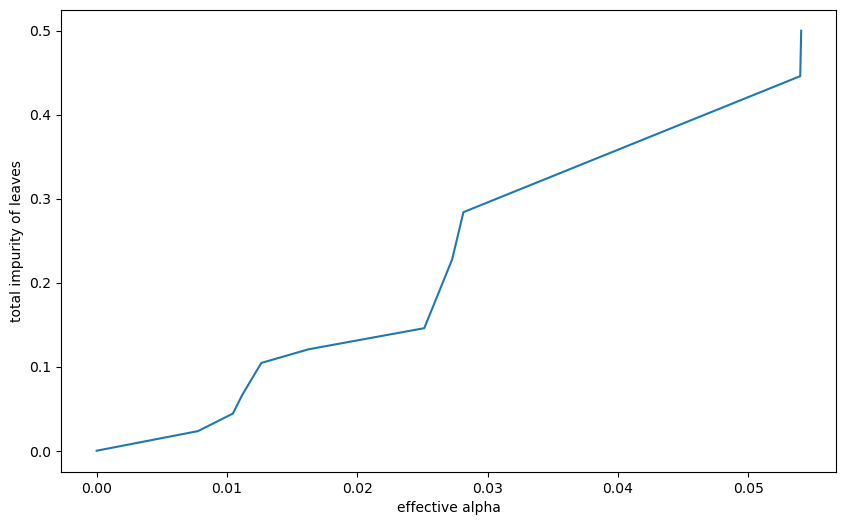

In [18]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [19]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)
# Here I asked for the third value from all the possible alpha (the first one is 0, already done with the basic tree)

[Text(0.6333333333333333, 0.9545454545454546, 'x[0] <= 0.76\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(0.5666666666666667, 0.8636363636363636, 'x[0] <= -0.646\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.5, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6333333333333333, 0.7727272727272727, 'x[1] <= 0.703\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(0.4, 0.6818181818181818, 'x[1] <= -0.558\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.3333333333333333, 0.5909090909090909, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.4666666666666667, 0.5909090909090909, 'x[1] <= -0.024\ngini = 0.353\nsamples = 48\nvalue = [11, 37]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= -0.126\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.26666666666666666, 0.4090909090909091, 'x[0] <= -0.456\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.2, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.333333333

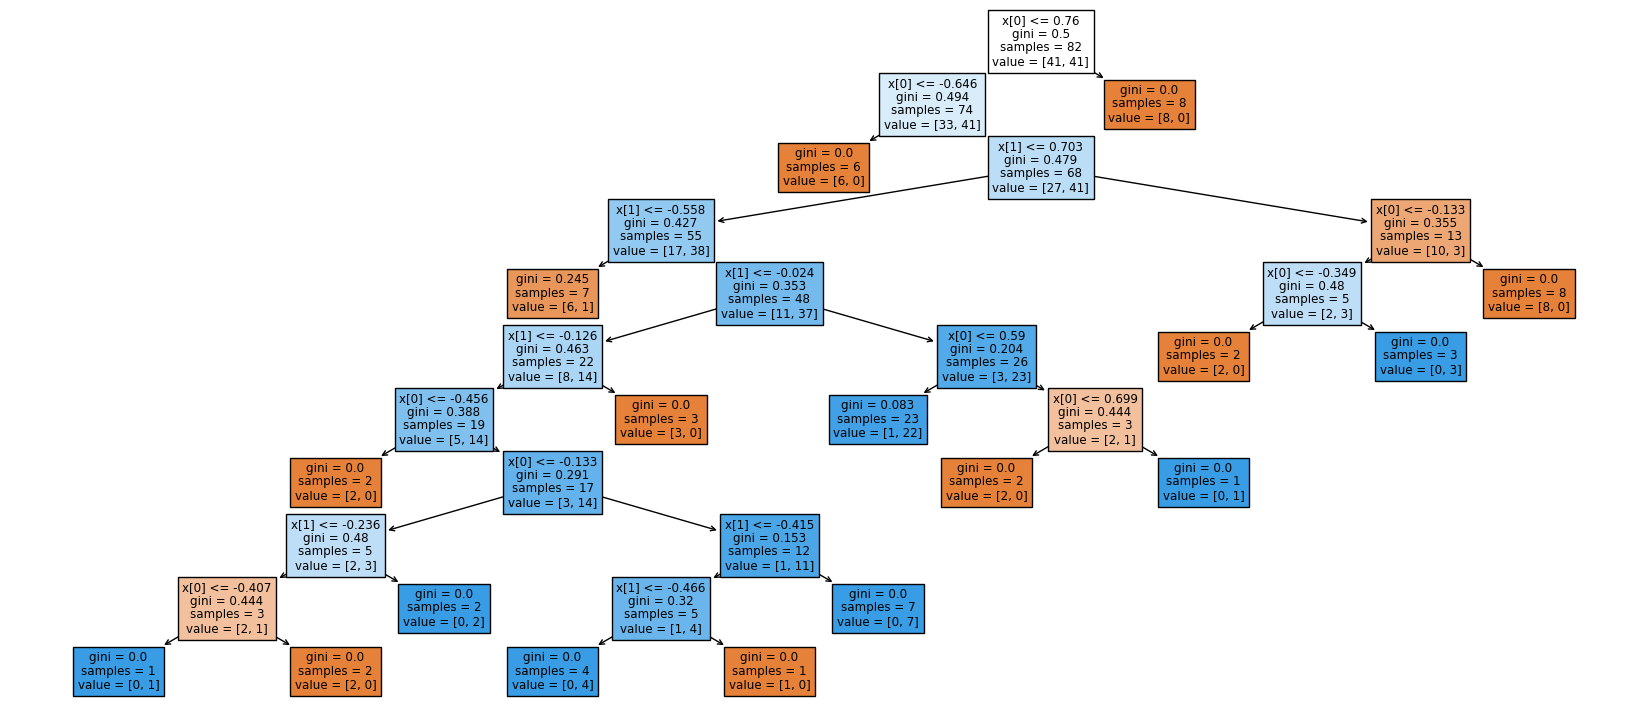

In [20]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt_pruned, filled=True)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


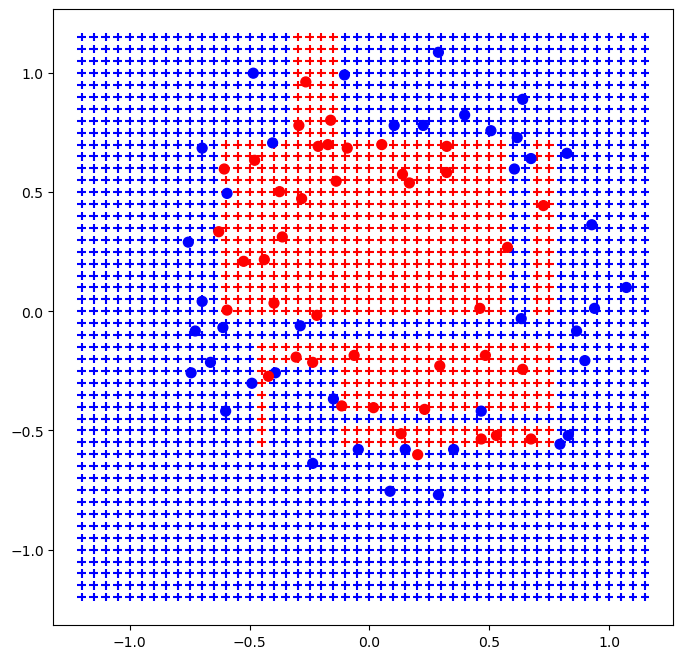

In [21]:
draw_boundary_tree(dt_pruned, data_train, -1.2, 1.2, -1.2, 1.2)

In [22]:
dt_pruned.score(data_train.iloc[:,0:2],data_train.Y)

0.975609756097561

In [23]:
dt_pruned.score(data_valid.iloc[:,0:2],data_valid.Y)

0.8333333333333334

In [24]:
pruned_models = []
pred_scores = []
val_scores = []
for aplha in path.ccp_alphas:
    dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=aplha).fit(data_train.iloc[:,0:2], data_train.Y)
    p_score = dt_pruned.score(data_train.iloc[:,0:2],data_train.Y)
    v_score = dt_pruned.score(data_valid.iloc[:,0:2],data_valid.Y)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_models.append(dt_pruned)

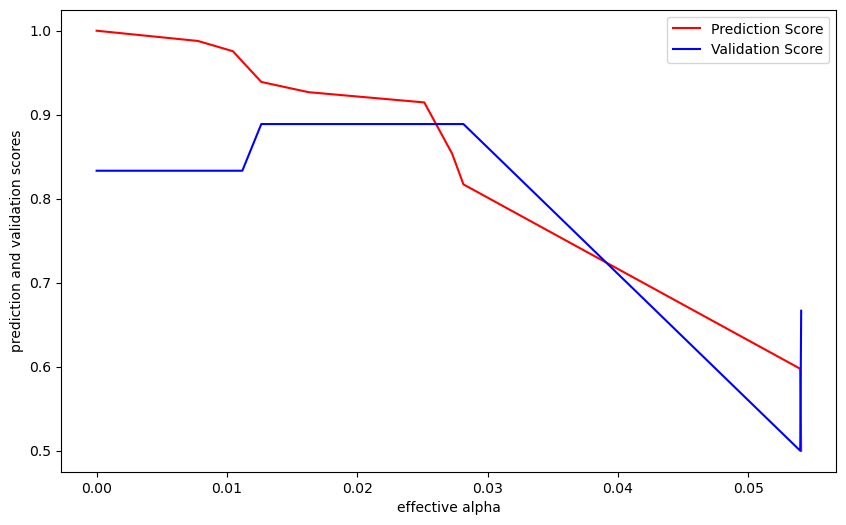

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, pred_scores,color='red',label='Prediction Score')
plt.plot(ccp_alphas,val_scores,color='blue',label='Validation Score')
plt.xlabel("effective alpha")
plt.ylabel("prediction and validation scores")
plt.legend()
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with featur

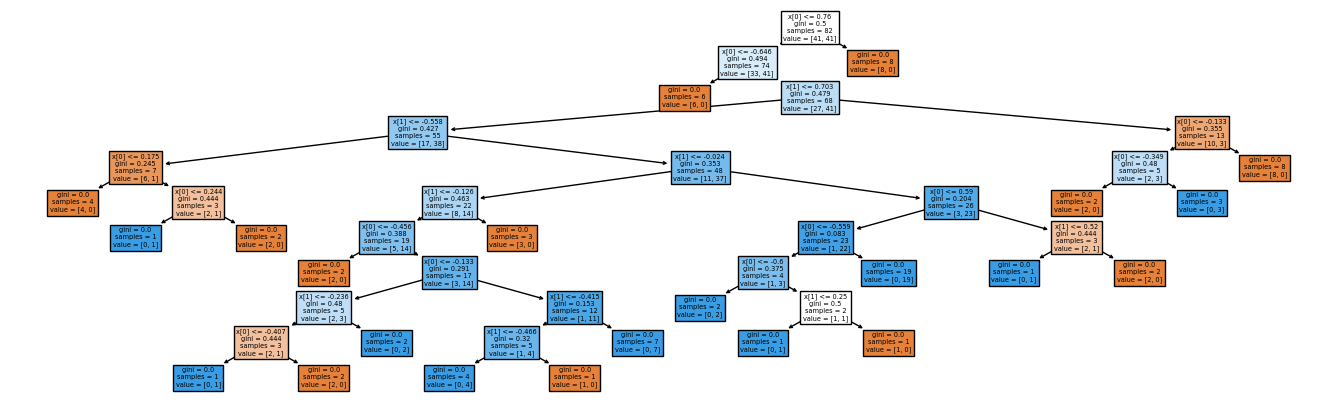

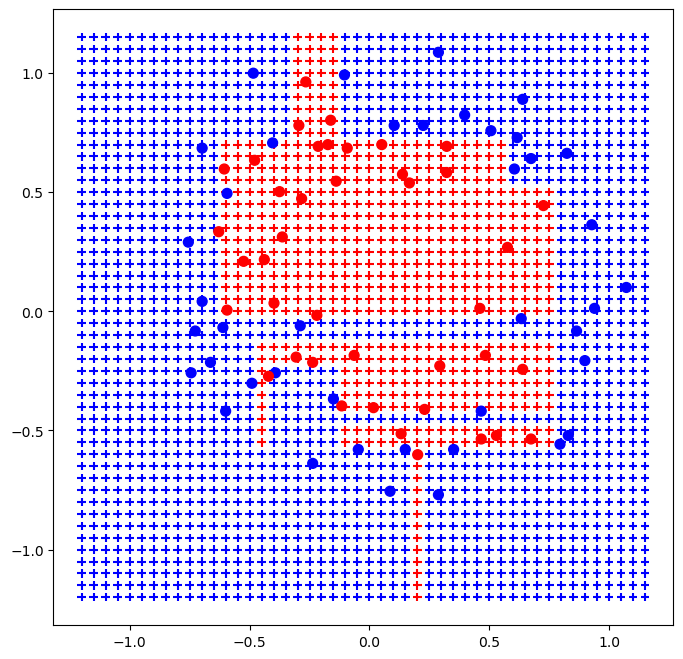

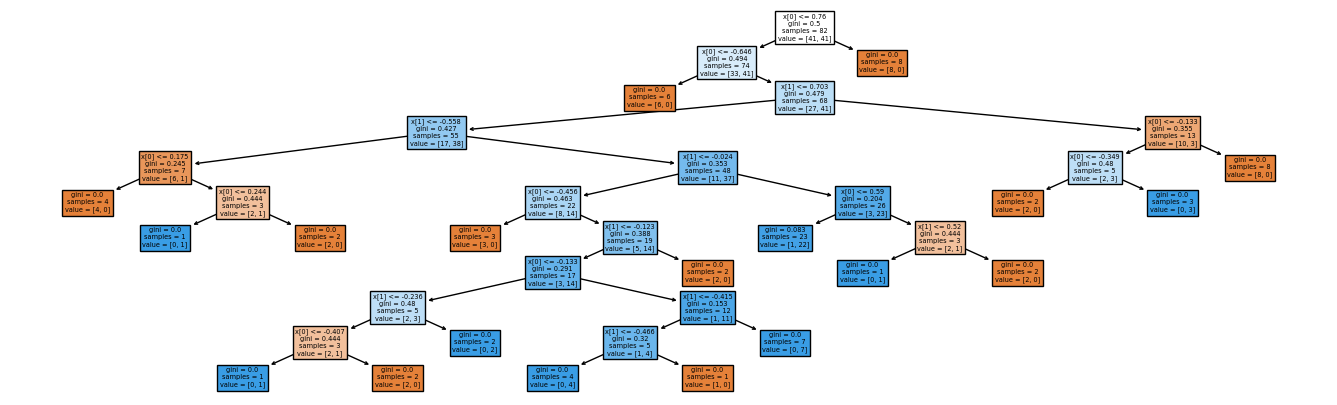

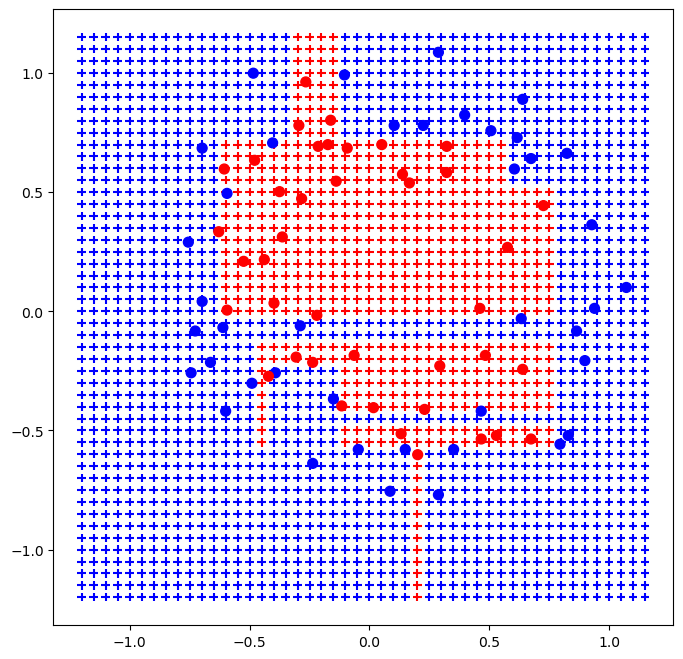

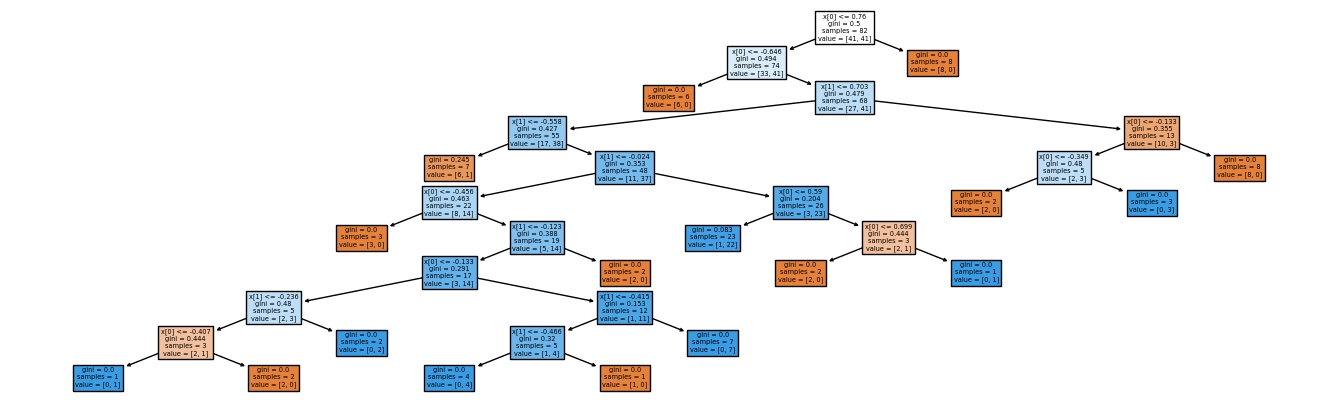

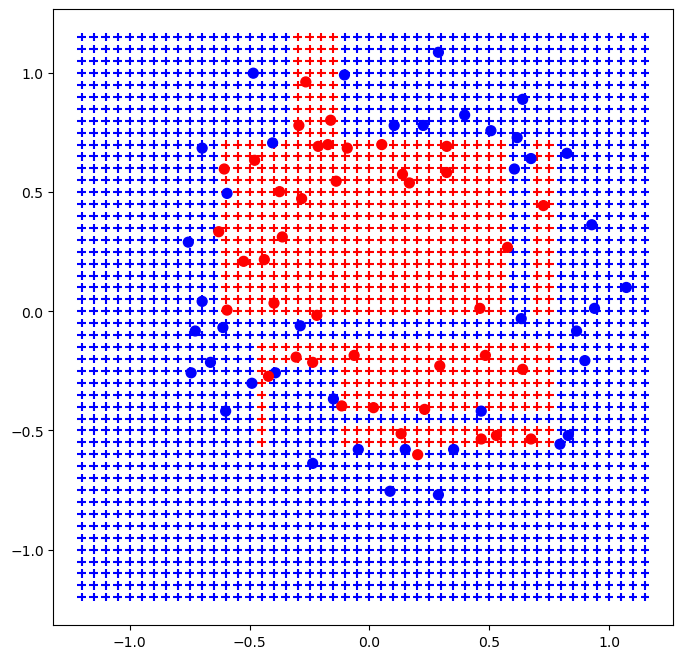

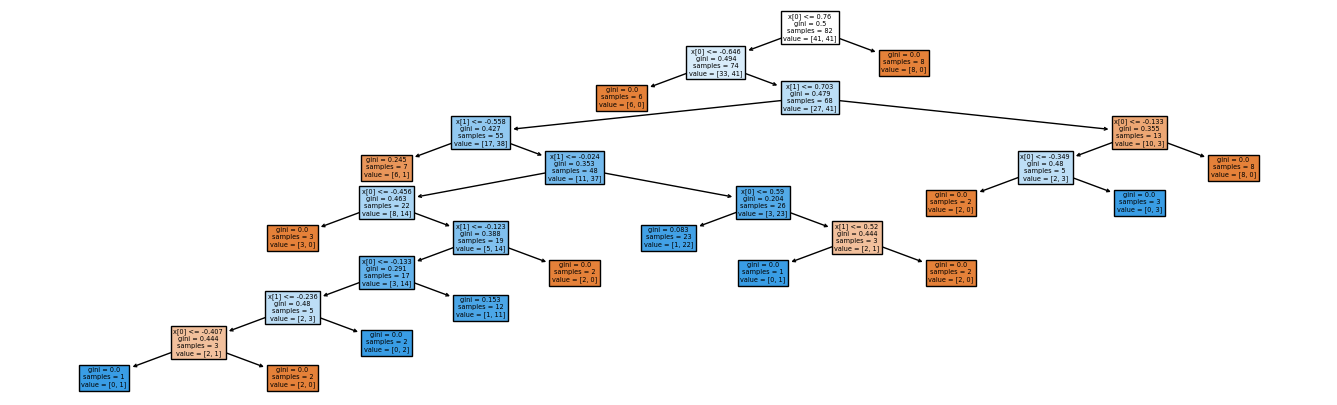

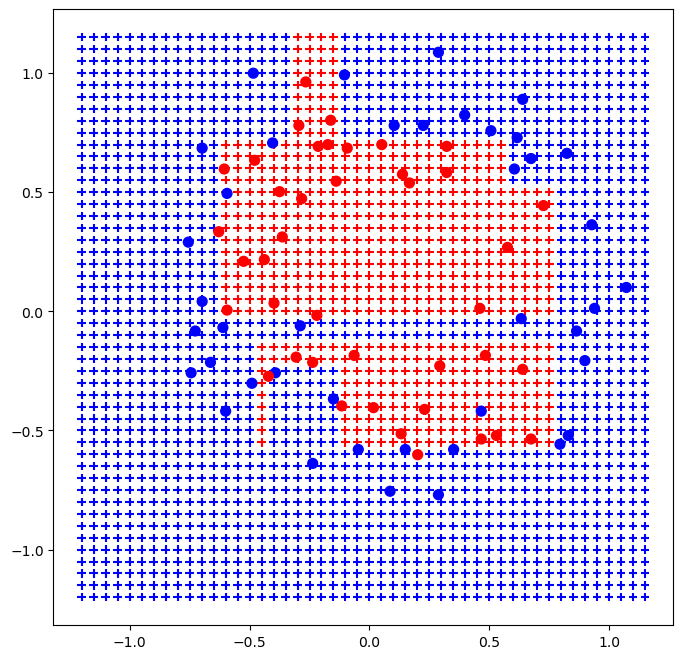

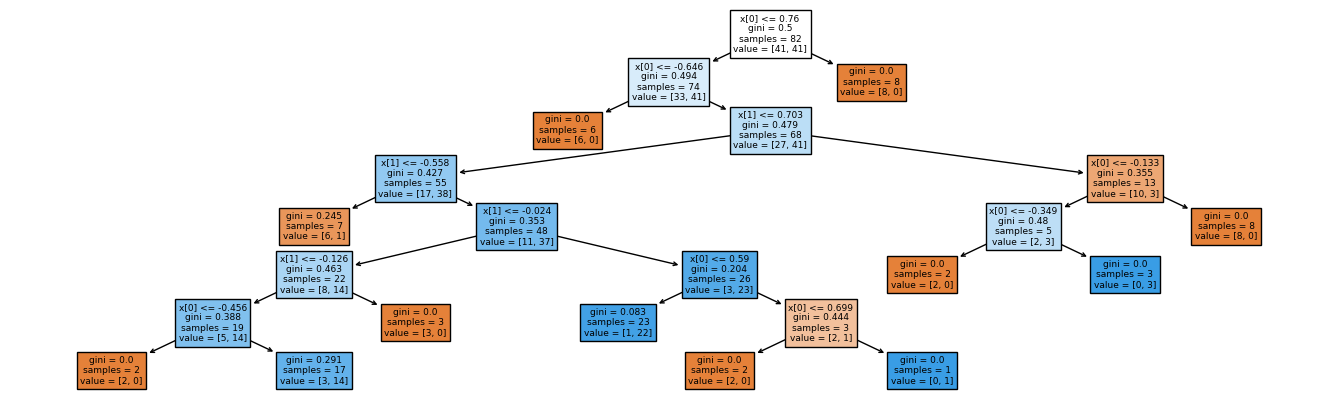

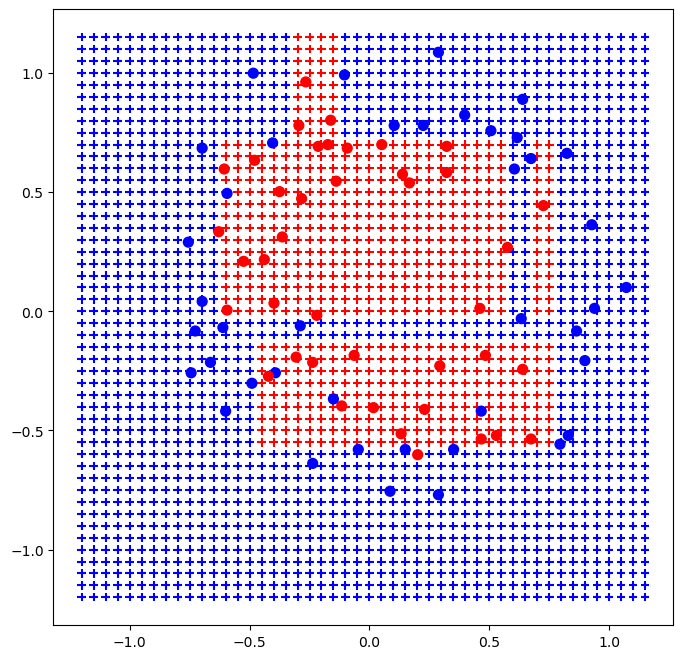

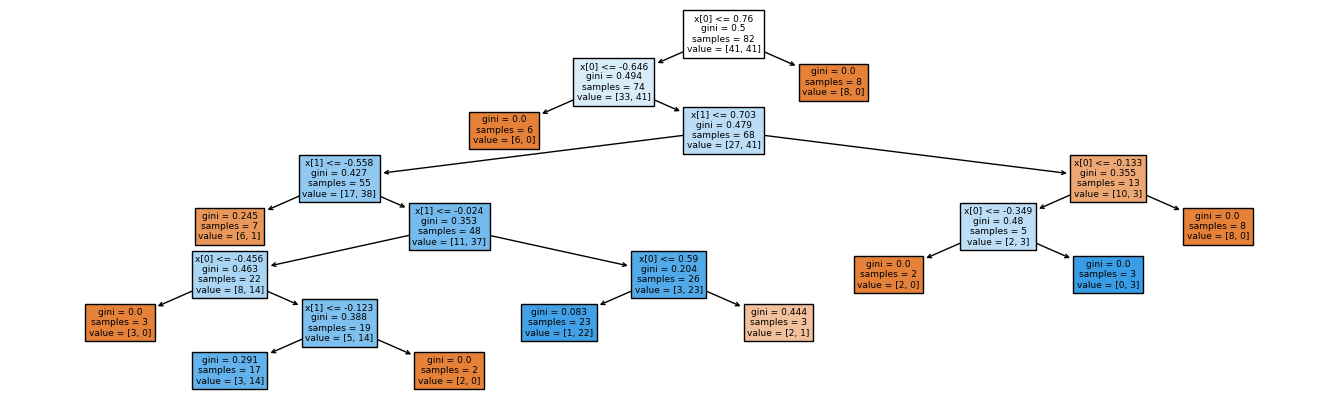

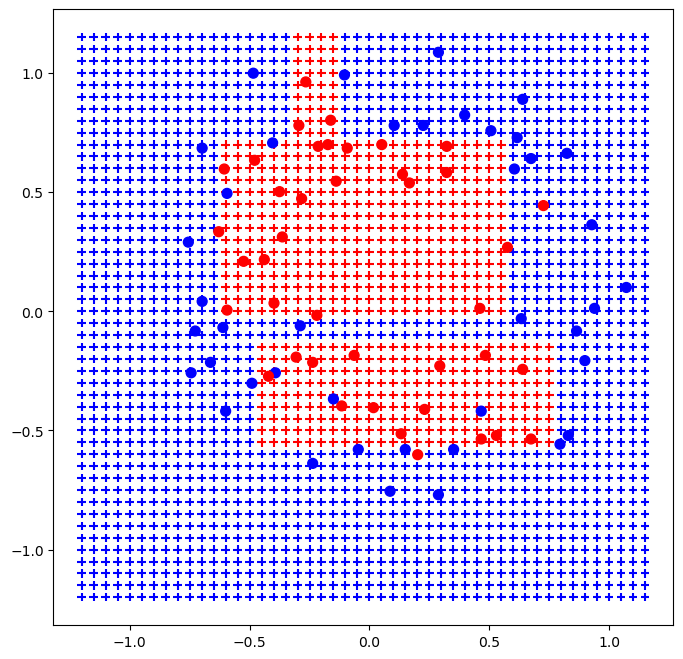

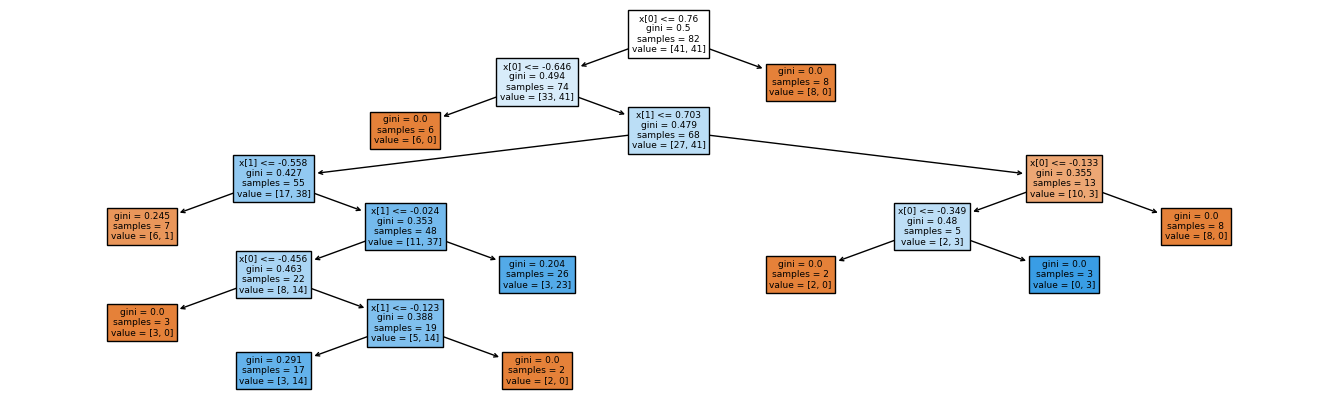

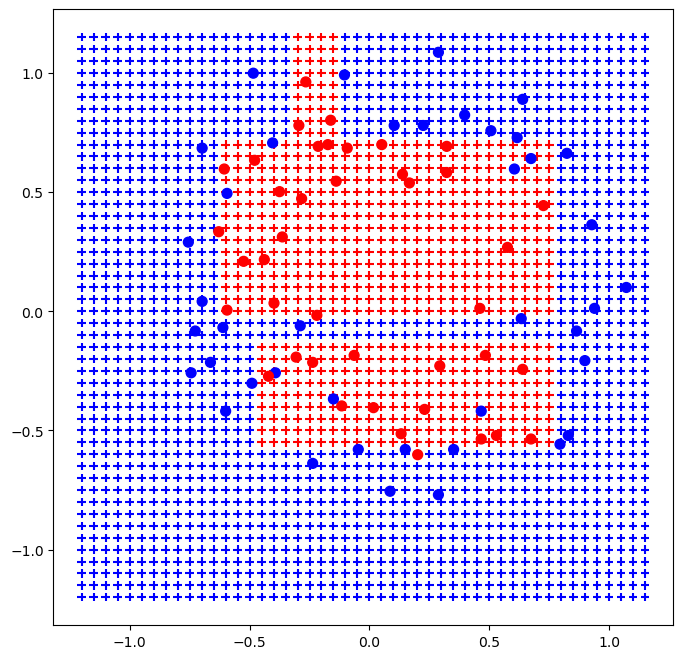

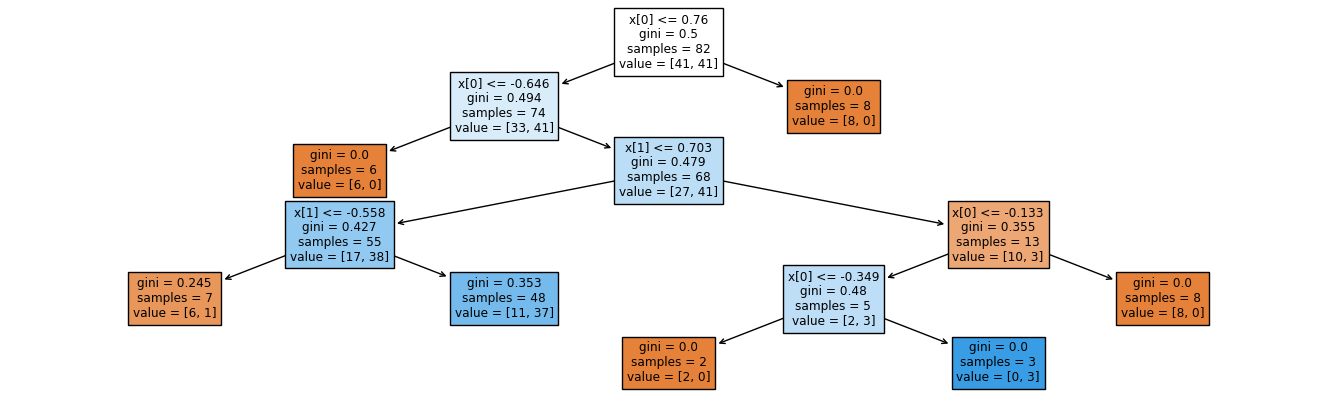

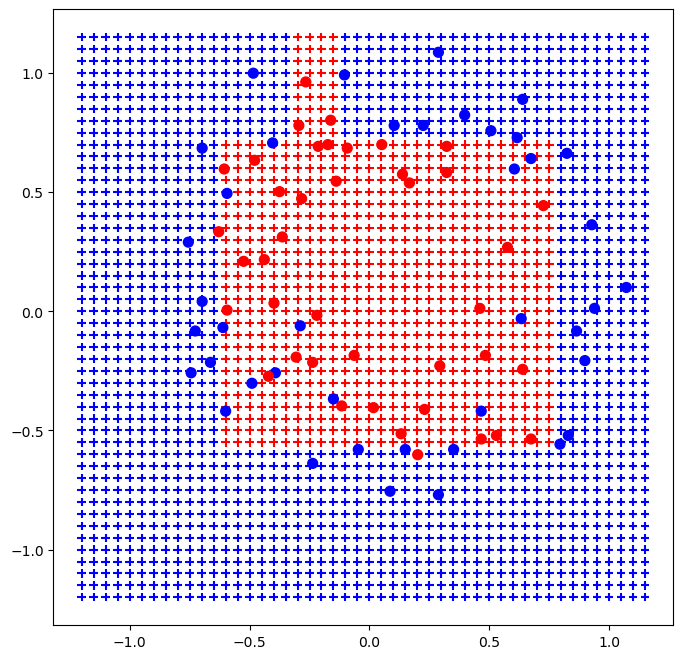

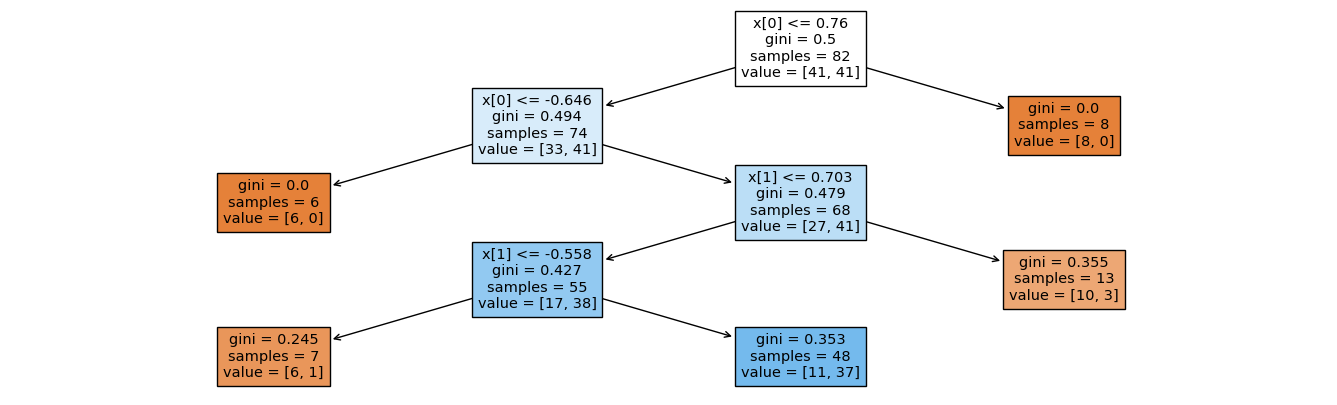

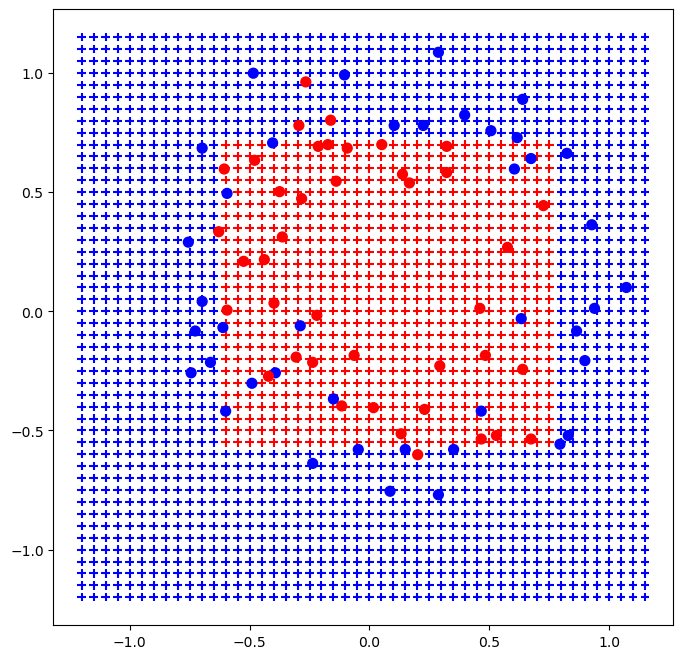

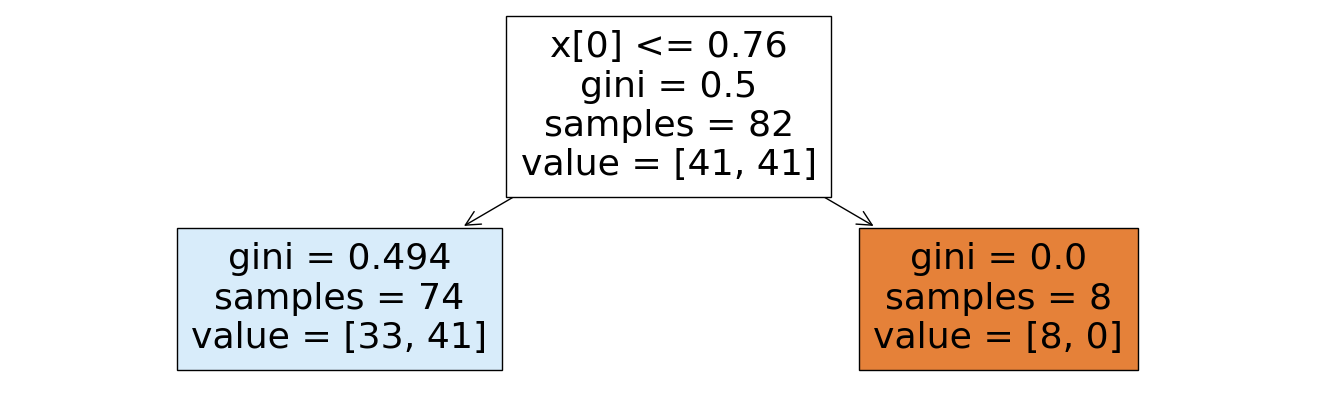

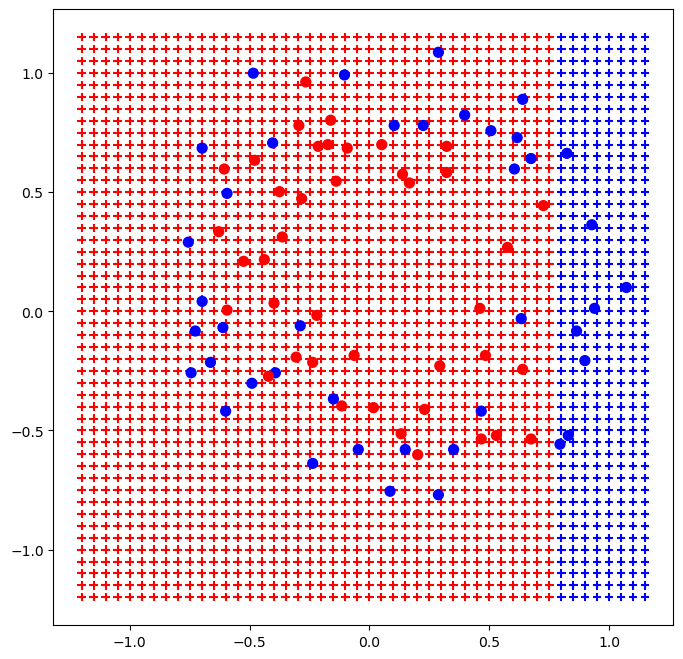

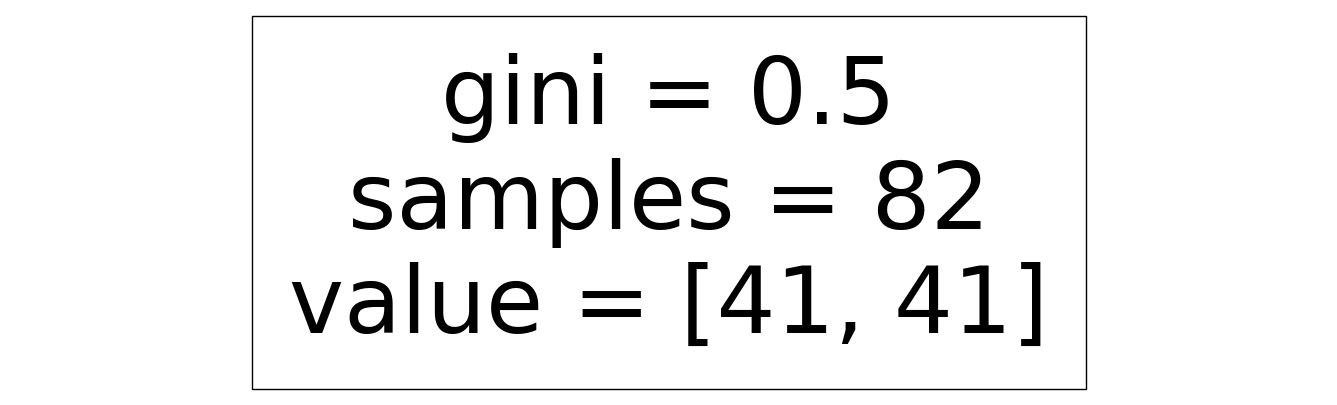

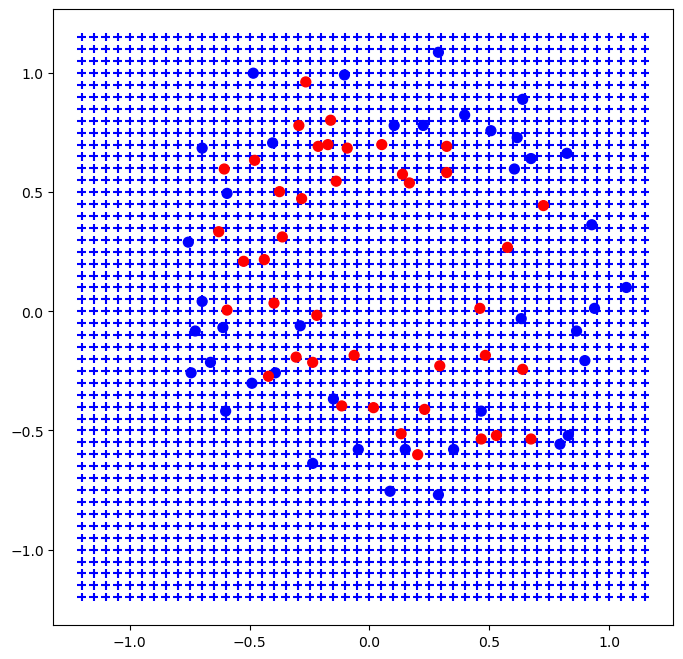

In [37]:
for model in pruned_models:
    plt.figure(figsize=(17,5))
    tree.plot_tree(model, filled=True)
    draw_boundary_tree(model, data_train, -1.2, 1.2, -1.2, 1.2)

In [41]:
print(val_scores)
print(pred_scores)
print(ccp_alphas)

[0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.5, 0.6666666666666666]
[1.0, 0.9878048780487805, 0.975609756097561, 0.9634146341463414, 0.9390243902439024, 0.926829268292683, 0.9146341463414634, 0.8536585365853658, 0.8170731707317073, 0.5975609756097561, 0.5]
[0.         0.0077766  0.01045296 0.01117886 0.01263351 0.01626016
 0.02513799 0.02727425 0.02814259 0.05398197 0.05405405]


In [43]:
ccp_alphas[4]

0.012633508688028058

In [45]:
chosen_tree = pruned_models[4]
chosen_tree

DecisionTreeClassifier(ccp_alpha=0.012633508688028058)

In [46]:
chosen_tree.score(data_test.iloc[:,0:2],data_test.Y)

0.7777777777777778

# Exercise 2 : with a real dataset of handwritten digits

In [6]:
mnist = pd.read_csv('cp_sample.csv', sep=';')
mnist.shape

(1000, 785)

In [51]:
mnist.label.value_counts()

2    121
1    113
4    104
3    100
8    100
0     97
7     94
6     91
5     91
9     89
Name: label, dtype: int64

In [52]:
# The values of pixels and label for one image can be obtained by the command:
mnist.iloc[0,:] # First image of the dataset
# You can see that the label is in the column 'label' and the other columns are pixel0, pixel1, etc...
# This first image represents the digit 1

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

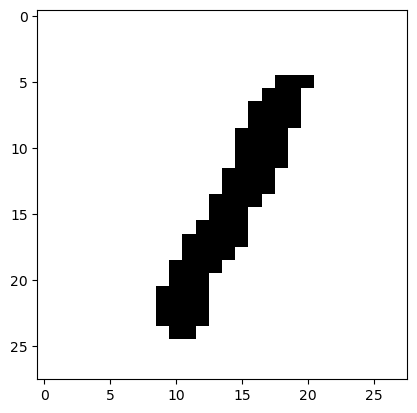

In [53]:
# It is possible to see an image from its pixel values using the following command:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28),cmap = 'Greys')
# Here is the first image, representing a 1

In [7]:
mnist_train, mnist_test = train_test_split(mnist, test_size = 0.3, random_state = 4)
mnist_valid, mnist_test = train_test_split(mnist_test, test_size = 0.5, random_state = 4)

In [94]:
mnist_dt = tree.DecisionTreeClassifier().fit(mnist_train.iloc[:,1:],mnist_train.label)


In [95]:
mnist_dt.score(mnist_train.iloc[:,1:],mnist_train.label)

1.0

In [96]:
mnist_dt.score(mnist_valid.iloc[:,1:],mnist_valid.label)

0.6466666666666666

In [97]:
mnist_dt.predict(mnist_valid.iloc[1:2,1:].to_numpy().reshape(1,-1))[0]

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


7

In [100]:
mnist_train.iloc[:,1:].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
clf_tree = tree.DecisionTreeClassifier() # first declare a tree
path_mnist = clf_tree.cost_complexity_pruning_path(mnist_train.iloc[:,1:], mnist_train.label) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path_mnist['ccp_alphas']

array([0.        , 0.00128571, 0.00140553, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00190476, 0.00190476, 0.00190476,
       0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
       0.00190476, 0.00190476, 0.00214286, 0.00214286, 0.00214286,
       0.00214286, 0.00214286, 0.00214286, 0.00214286, 0.00214286,
       0.0022449 , 0.00228571, 0.00228571, 0.00228571, 0.00228571,
       0.00228571, 0.00228571, 0.00238095, 0.00238095, 0.00242857,
       0.00244898, 0.00253968, 0.00257143, 0.00257143, 0.0025974 ,
       0.00261905, 0.00261905, 0.00261905, 0.00261905, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00271062, 0.0027381 ,
       0.00274131, 0.00276717, 0.00278912, 0.00280323, 0.00285714,
       0.00285714, 0.00285714, 0.00285714, 0.00326531, 0.00333

In [114]:
mnist_pruned_models = []
mnist_pred_scores = []
mnist_val_scores = []
for aplha in path_mnist.ccp_alphas:
    dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=aplha).fit(mnist_train.iloc[:,1:], mnist_train.label)
    p_score = dt_pruned.score(mnist_train.iloc[:,1:], mnist_train.label)
    v_score = dt_pruned.score(mnist_valid.iloc[:,1:], mnist_valid.label)
    mnist_pred_scores.append(p_score)
    mnist_val_scores.append(v_score)
    mnist_pruned_models.append(dt_pruned)

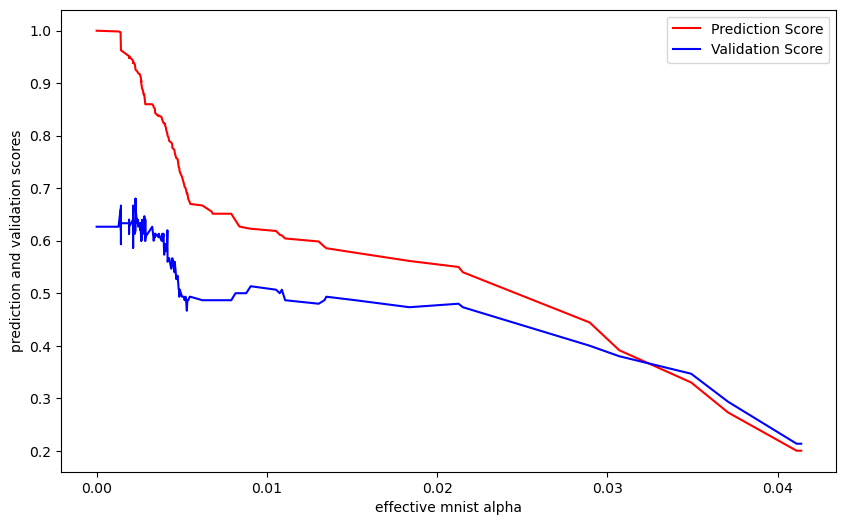

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(path_mnist.ccp_alphas, mnist_pred_scores,color='red',label='Prediction Score')
plt.plot(path_mnist.ccp_alphas,mnist_val_scores,color='blue',label='Validation Score')
plt.xlabel("effective mnist alpha")
plt.ylabel("prediction and validation scores")
plt.legend()
plt.show()

In [117]:
best_alpha = mnist_val_scores.index(max(mnist_val_scores))
best_alpha

43

In [119]:
best_mnist_tree_model = mnist_pruned_models[best_alpha]

In [120]:
best_mnist_tree_model.score(mnist_test.iloc[:,1:],mnist_test.label)

0.6

## Trying the model on your own written image 

In [142]:
import skimage.io
def read_myimage(f):
    myimage = skimage.io.imread(f, as_gray=True)
    i0 = np.where(myimage==0)
    i1 = np.where(myimage == 1)
    myimage[i0] = 1
    myimage[i1] = 0
    plt.imshow(myimage, cmap='Greys')
    return myimage.reshape(1,28*28)

array([7])

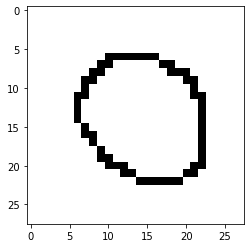

In [147]:
myim = read_myimage('test_0.png')
dt.predict(myim) # if dt is the name of your model

## Logistic regression for the same task

# Using HOG representation rather than pixel values

In [2]:
from skimage.feature import hog

In [8]:
myimage = mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1),channel_axis=2)
myimage_hog

array([0.70710678, 0.        , 0.70710678, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.63453054, 0.        ,
       0.63453054, 0.        , 0.44129581, 0.        , 0.        ,
       0.        , 0.59539679, 0.        , 0.59539679, 0.        ,
       0.23002187, 0.        , 0.48795006, 0.        , 0.70710678,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [9]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell),channel_axis=2 ,cells_per_block=(1,1))))

In [10]:
hog_train = mnist_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= mnist_valid.apply(my_hog, axis=1, args=(8,14))
hog_test = mnist_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = mnist_train.label
hog_valid['label'] = mnist_valid.label
hog_test['label'] = mnist_test.label

In [11]:
hog_train
# you see here that each image of the training set is now a vector of length 32

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
715,0.502681,0.0,0.502681,0.0,0.491869,0.0,0.502681,0.0,0.331770,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,8
920,0.699372,0.0,0.699372,0.0,0.147506,0.0,0.000000,0.0,0.500000,0.0,...,0.0,0.681478,0.0,0.681478,0.0,0.000000,0.0,0.266785,0.0,9
295,0.465444,0.0,0.618883,0.0,0.618883,0.0,0.131647,0.0,0.500000,0.0,...,0.0,0.307510,0.0,0.543607,0.0,0.552236,0.0,0.552236,0.0,2
83,0.517744,0.0,0.517744,0.0,0.517744,0.0,0.442518,0.0,0.568812,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0
942,0.604642,0.0,0.604642,0.0,0.377247,0.0,0.355672,0.0,0.603838,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0.555912,0.0,...,0.0,0.572579,0.0,0.572579,0.0,0.572579,0.0,0.128290,0.0,0
709,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.615943,0.0,...,0.0,0.656532,0.0,0.754298,0.0,0.000000,0.0,0.000000,0.0,1
439,0.707107,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.566947,0.0,...,0.0,0.558947,0.0,0.558947,0.0,0.558947,0.0,0.250470,0.0,0
174,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.197028,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,5


In [150]:
clf_tree = tree.DecisionTreeClassifier() # first declare a tree
path_hog = clf_tree.cost_complexity_pruning_path(hog_train.iloc[:,:-1], hog_train.label) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path_hog['ccp_alphas']

array([0.        , 0.00047619, 0.00071429, 0.00089636, 0.00107143,
       0.00122449, 0.00125   , 0.00126984, 0.00129762, 0.00135338,
       0.00137143, 0.00138528, 0.00139456, 0.00139752, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00152381, 0.00171429, 0.00171429, 0.00185714, 0.00190476,
       0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
       0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
       0.00194444, 0.00195918, 0.002     , 0.00203175, 0.00208163,
       0.00212245, 0.00212698, 0.00214286, 0.00214286, 0.00214286,
       0.00214286, 0.00214286, 0.00214286, 0.00214286, 0.00214286,
       0.00214286, 0.00219388, 0.00222222, 0.00226757, 0.00228571,
       0.00228571, 0.00229025, 0.00230612, 0.00232143, 0.00233794,
       0.00235714, 0.00241486, 0.00244898, 0.00244898, 0.0025 

In [151]:
pruned_hog_models = []
hog_pred_scores = []
hog_val_scores = []
for aplha in path_hog.ccp_alphas:
    dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=aplha).fit(hog_train.iloc[:,:-1], hog_train.label)
    p_score = dt_pruned.score(hog_train.iloc[:,:-1], hog_train.label)
    v_score = dt_pruned.score(hog_valid.iloc[:,:-1], hog_valid.label)
    hog_pred_scores.append(p_score)
    hog_val_scores.append(v_score)
    pruned_hog_models.append(dt_pruned)

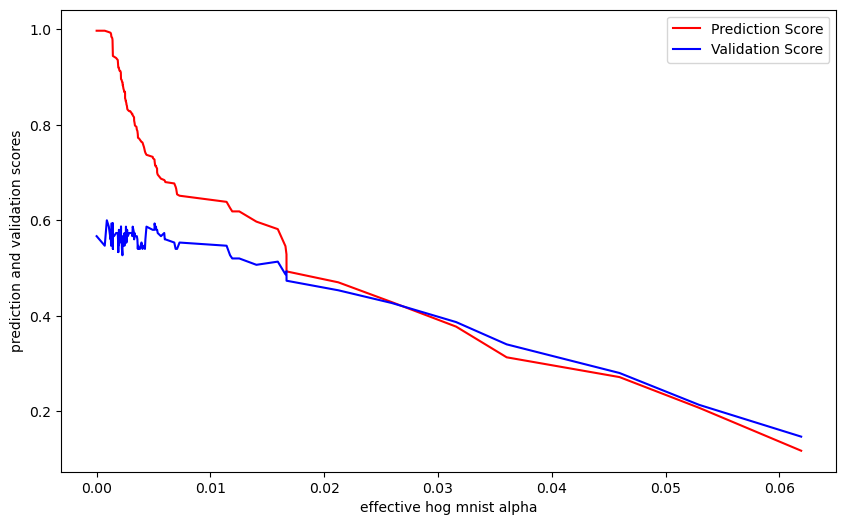

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(path_hog.ccp_alphas, hog_pred_scores,color='red',label='Prediction Score')
plt.plot(path_hog.ccp_alphas,hog_val_scores,color='blue',label='Validation Score')
plt.xlabel("effective hog mnist alpha")
plt.ylabel("prediction and validation scores")
plt.legend()
plt.show()

In [153]:
best_alpha_idx = hog_val_scores.index(max(hog_val_scores))
best_alpha_idx

3

In [154]:
best_hog_model = pruned_hog_models[best_alpha_idx]
best_hog_model

DecisionTreeClassifier(ccp_alpha=0.0008963585434173671)

In [155]:
best_hog_model.score(hog_test.iloc[:,:-1],hog_test.label)

0.5733333333333334

In [182]:
myimage = mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28,28,1), orientations=11, pixels_per_cell=(12,12), cells_per_block=(1,1),channel_axis=2)
myimage_hog

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.60697696, 0.        , 0.60697696, 0.        ,
       0.        , 0.51298921, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.650625  , 0.        , 0.650625  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.39163021, 0.        , 0.        , 0.70710678, 0.        ,
       0.70710678, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [23]:
hog_train = mnist_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= mnist_valid.apply(my_hog, axis=1, args=(8,14))
hog_test = mnist_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = mnist_train.label
hog_valid['label'] = mnist_valid.label
hog_test['label'] = mnist_test.label
clf_tree = tree.DecisionTreeClassifier() # first declare a tree
path_hog = clf_tree.cost_complexity_pruning_path(hog_train.iloc[:,:-1], hog_train.label) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path_hog['ccp_alphas']

array([0.        , 0.00047619, 0.00071429, 0.00089636, 0.00107143,
       0.00122449, 0.00125   , 0.00126984, 0.00129762, 0.00135338,
       0.00137143, 0.00138528, 0.00139456, 0.00139752, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00142857, 0.00142857, 0.00142857, 0.00142857,
       0.00142857, 0.00152381, 0.00171429, 0.00171429, 0.00185714,
       0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
       0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
       0.00190476, 0.00194444, 0.00195918, 0.002     , 0.00203175,
       0.00208163, 0.00212245, 0.00212698, 0.00214286, 0.00214286,
       0.00214286, 0.00214286, 0.00214286, 0.00214286, 0.00214286,
       0.00214286, 0.00214286, 0.00219388, 0.00222222, 0.00226757,
       0.00228571, 0.00229025, 0.00230612, 0.00232143, 0.00233794,
       0.00235714, 0.00241486, 0.00244898, 0.00244898, 0.0025 

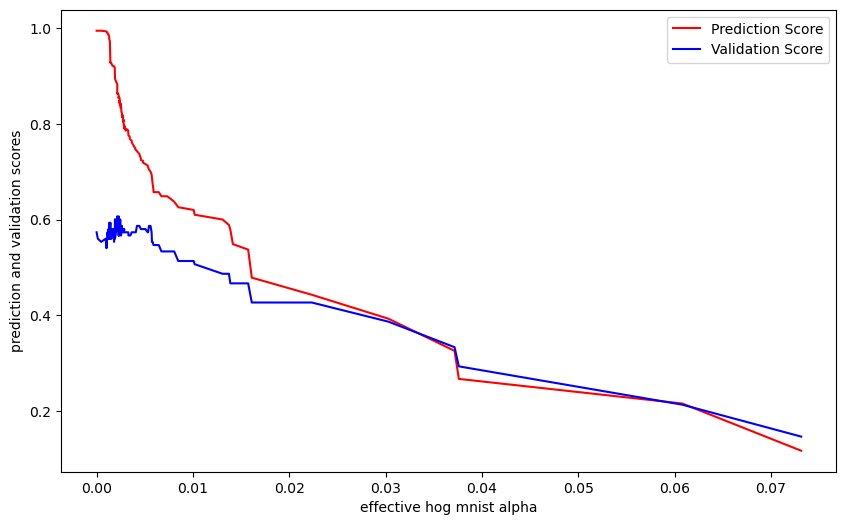

In [184]:
pruned_hog_models = []
hog_pred_scores = []
hog_val_scores = []
for aplha in path_hog.ccp_alphas:
    dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=aplha).fit(hog_train.iloc[:,:-1], hog_train.label)
    p_score = dt_pruned.score(hog_train.iloc[:,:-1], hog_train.label)
    v_score = dt_pruned.score(hog_valid.iloc[:,:-1], hog_valid.label)
    hog_pred_scores.append(p_score)
    hog_val_scores.append(v_score)
    pruned_hog_models.append(dt_pruned)
    
plt.figure(figsize=(10, 6))
plt.plot(path_hog.ccp_alphas, hog_pred_scores,color='red',label='Prediction Score')
plt.plot(path_hog.ccp_alphas,hog_val_scores,color='blue',label='Validation Score')
plt.xlabel("effective hog mnist alpha")
plt.ylabel("prediction and validation scores")
plt.legend()
plt.show()

In [12]:
best_alpha_idx = hog_val_scores.index(max(hog_val_scores))
best_hog_model = pruned_hog_models[best_alpha_idx]
best_hog_model.score(hog_test.iloc[:,:-1],hog_test.label)

NameError: name 'hog_val_scores' is not defined

In [28]:
lr_model = LogisticRegression(max_iter = 10000).fit(hog_train.iloc[:,:-1],hog_train.label)

In [29]:
lr_model.score(hog_valid.iloc[:,:-1],hog_valid.label)

0.62

In [30]:
lr_model.score(hog_test.iloc[:,:-1],hog_test.label)

0.6666666666666666